In [ ]:
#Titanic nprzykład analizy

In [ ]:
#1. Import danych i bibliotek

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Dane\2_ML_Projekty\003_programowanie_ML_zadanka_kurs_wprowadzenie\Moduł 4\Zbiory danych\titanic.csv")

In [ ]:
#Ogólny opis danych

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# id pasażera, Survived czy przeżył czy nie pclass klasa gdzie byłitd Sibl-krewnirodzenstwo  
#Parch-ile rodziców lub dzieci bylo na pokladzie
#Embarked który port

In [ ]:
#wyswietlimy wszystkie zmienne,podaje typ,ile obserwacji 891 ile jest nie null obserwacji dla age 714 różnica to wartości brakujące

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.shape   #ile wierszy ile kolumn

(891, 12)

In [6]:
df.describe()  #opis zmiennych numerycznych jak w age by było 200 to by trzeba usunac ten rekord

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.describe(include=['O'])    #wyświetlenie zmiennnych kategorycznych

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [ ]:
# zliczamy braki danych wartości unikalne dwie płcie.

In [ ]:
#3. Analiza zmiennej celu Survived

In [8]:
df['Survived'].value_counts()   #ilu pasażerów przeżyło a ilu nie

Survived
0    549
1    342
Name: count, dtype: int64

In [ ]:
#to samo w ujęciu procentowym

In [9]:
df['Survived'].value_counts(normalize=True) 

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

In [ ]:
#4.Zmienna celu a zmienne jakościowe 

In [ ]:
#Grupowanei zbioru danych po zmiennej jakościowej i wyliczamy średnia wartość zmiennej celu. 
#Sprawdzimy czy udział osób które przeżyły jest większy w konkretnej kategorii.

In [ ]:
#wybieramy szukaną zmienna i zmienna jakościową inną

In [ ]:
#szukana zmienna i zmienna jakosciowa bierzemy je i grupujemy po zmiennej jakosciowej wyznaczajac srednia

In [10]:
df[['Survived','Sex']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [ ]:
# Sprawdzilismy, że znaczenie na przeżycie miała płeć.Kobiety i dzieci szły jako pierwsze do szalup

In [ ]:
#teraz próbujemy sprawdzić zaleznosć miedzy tymi co przeżyli a klasa 

In [11]:
df[['Survived','Pclass']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [ ]:
#procentowy rozkład tych co przeżyli w  zaleznosci od liczby rodzeństwa

In [12]:
df[['Survived','SibSp']].groupby(['SibSp']).mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [ ]:
#procentowo Ci co przeżyli w zaleznosci od liczby rodzenstwa warto sprawdzić 
#lcizebnosc tych grup bo 8 rodzenstwa miało niewiele osob.

In [ ]:
#Zaleznosc między tymi co przeżyli a portem rozpoczecia podróży

In [13]:
df[['Survived','Embarked']].groupby(['Embarked']).mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [ ]:
#Pozostałem zmienne jak name ticket i cabin mają duzo unikalnych wartości 

In [14]:
df.describe(include=['O']) 

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [ ]:
#5.Zmienna celu pod katem zmiennych ilosciowych

In [ ]:
#to grupowanie co powyżej nie będzie miało sensu w ich przypadku.Grupowanie ale po zmiennej celu i zobaczymy i jaka 
#jest wartość średniej zmiennej ilościowej dla odpowadajacej kategorii zmiennej celu.

In [15]:
df[['Survived','Age']].groupby(['Survived']).mean()

,Age
Survived,
0,30.626179
1,28.343690


In [ ]:
#otrzymuje informacje jaka była średnia wieku tych co nie przeżyli i ci co przeżyli katastrofę

In [ ]:
#tak równiez moge ocenic czy dana zmienna ma wpływ na zmienną celu czy jest zróznicowanie

In [ ]:
#analiza zmiennej Fare kosztu biletu

In [16]:
df[['Survived','Fare']].groupby(['Survived']).mean()

,Fare
Survived,
0,22.117887
1,48.395408


In [ ]:
#osoby które rpzeżyły płaciły za bilet  więcej od tych co nie przeżyli

In [ ]:
#6. Wizualizacje

In [ ]:
#Jak na wykresie słupkowym  kształtuje sieudział osób które przeżyły katastrofęz podziałem na płeć

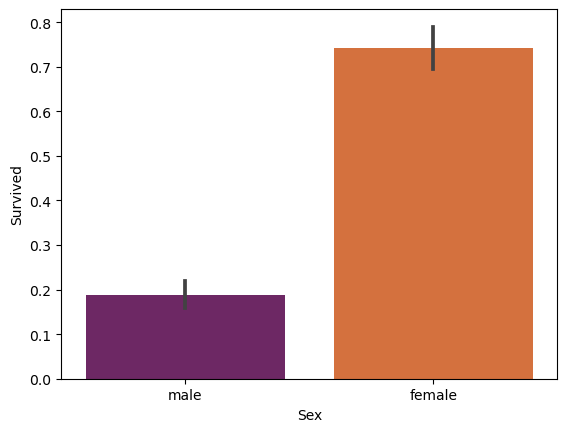

In [17]:
sns.barplot(x='Sex', y='Survived', data=df, palette = 'inferno')
plt.show()

In [18]:
# wcześniejszej analizy odnośnie ilu mezczyzn a ile kobiet przeżył:
df[['Survived','Sex']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [ ]:
#Dane te sie potwierdziły

In [ ]:
#podobny wykres dla zmiennej Embarked gdzie osoba wisadała na pokład statku

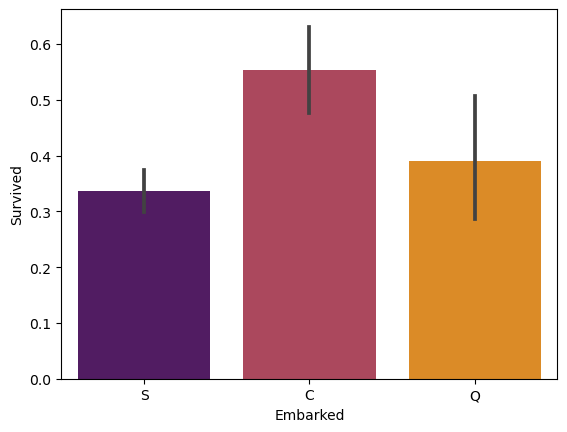

In [19]:
sns.barplot(x='Embarked', y='Survived', data=df, palette = 'inferno')
plt.show()

In [20]:
#analogicznie do tych danych odnosnie kto rpzeżyl wg portów gdzie wsiadali z punktu 3
df[['Survived','Embarked']].groupby(['Embarked']).mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


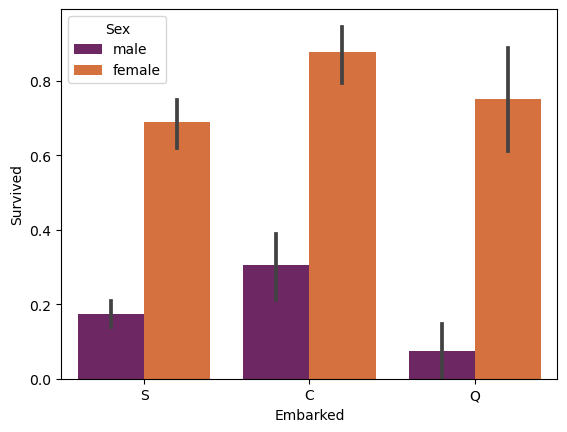

In [21]:
#łączymy teraz 3 zmienne
#analogicznie do tych danych odnosnie kto rpzeżyl wg portów gdzie wsiadali z punktu 3
sns.barplot(x='Embarked', y='Survived', hue='Sex', data=df, palette = 'inferno')
plt.show()

In [ ]:
# wkróym porcie według płci był największy odsetek ludzi co przeżyli katastrofę.Dla portu C najwiecej kobiet 
#przeżyło adla Q najmniej mężczyzn przeżyło

In [ ]:
#Wykorzystamy wkyres FacetGrid z seaborn pokaże on rozkłady wybranej zmiennej numerycznej w podziale na kategorie zmiennej celu.
#Zobaczymy czy te rozkłady się róznią.

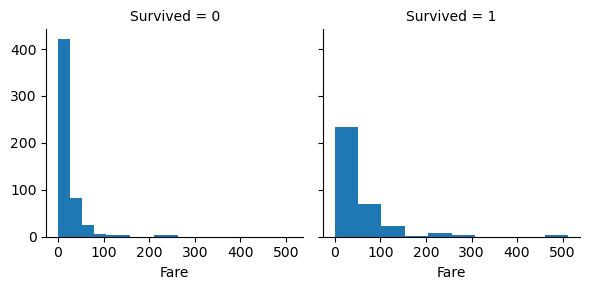

In [22]:
mapa=sns.FacetGrid(df,col="Survived")
mapa.map(plt.hist, 'Fare')
plt.show()

In [ ]:
#Sporo tych co nie przeżył katastrofy kupiło tanie bilety. Ci co przeżyli zapłacili wiecej za bilety

In [ ]:
#Podobny wykres dla zmiennej wiek Age


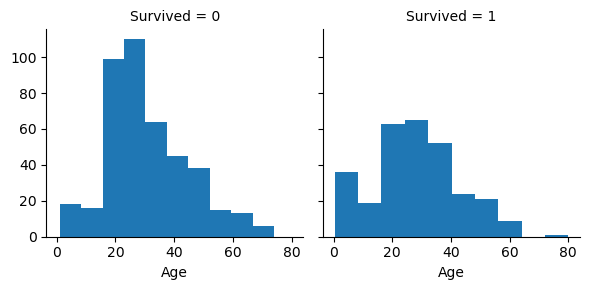

In [23]:
mapa=sns.FacetGrid(df,col="Survived")
mapa.map(plt.hist, 'Age')
plt.show()

In [ ]:
#najwięcej przeżyło luzi miedzy 20-30 rok życia a najwięcej zmarło między19 a 30.

In [ ]:
#7 ogólna analiza zmiennych objasniających zmiennych jakosciowych i ilościowych

In [ ]:
#Sprawdzenie rozkłądu zmiennych jakosciowych- sprawdzenie rozkładu liczebnosci poszcególnych zmiennych za pomocą metody value_counts()

In [24]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#przypominam zmienne

In [25]:
#tworzę lsite zmiennych kategorycznych
chars =['Pclass', 'Sex','SibSp', 'Parch', 'Embarked']
for i in chars:
    print(df[i].value_counts())
    print(' ')

Pclass
3    491
1    216
2    184
Name: count, dtype: int64
 
Sex
male      577
female    314
Name: count, dtype: int64
 
SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64
 
Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64
 
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
 


In [ ]:
#jeśli sa małoliczne kategorie to się zastanowić sie trzeba czy poxniej nie chcemy ich połaczyć

In [ ]:
#SibSp
#Dla osób z dużą liczbą rodzeństwa 5-8 jest malo tych osób i to można ew połaczyć a nawet jeszcze z 3+
#0    608
#1    209
#2     28
#4     18
#3     16
#8      7
#5      5
#Name: count, dtype: int64

In [ ]:
#Parch
#0    678
#1    118
#2     80
#5      5
#3      5
#4      4
#6      1
#Name: count, dtype: int64 podobnie dla Parch i 6,5,4,3 sa małe liczebnosci i mozna dołaczyć do 2

In [ ]:
# w embarked nic nie robimy

In [ ]:
#Zmienne ilościowe


In [26]:
nums =['Age','Fare']

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


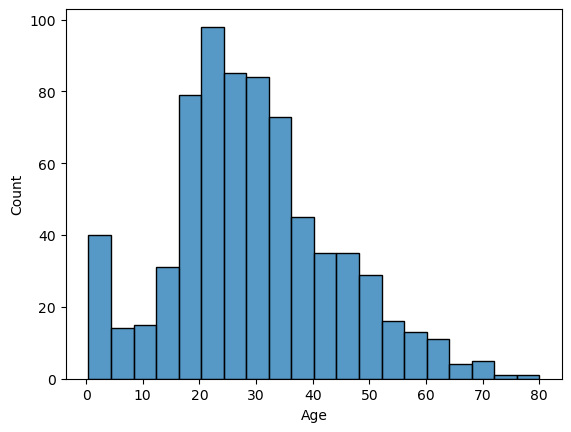

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


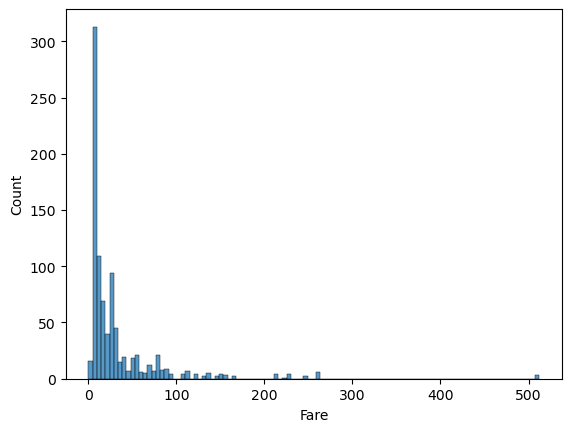

In [27]:
for i in nums:
    sns.histplot(df[i])
    plt.show()

In [ ]:
#bardzo dużo osób płaciło mało za bilet mało ale wiecej też jest rozkład

In [ ]:
#8. transformacja zmiennych Feature engineering transformacja zmiennych do uzyskania lepszej inforacji odnosnie zmiennych.

In [ ]:
#Usuwany nie potrzebne zmienne:

In [28]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# nie potrzebujemy passenger Id, ticket oraz Cabin 

In [ ]:
#Z tych wartości nic sensownego nie wyciągniemy.

In [ ]:
#Zmienna name zostawiamy bo da sie wyciagnąc cos ciekaego

In [29]:
df.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1, inplace=True) #usuwamy klumny a nie wiersze axis=1 inplace=true usuniecie przypisane do danych df

In [30]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [ ]:
#transformacja zmiennych 

In [ ]:
#Parch SibSp moga być zmiennymi kategorycznymi i niektóre kategorie są małoliczne.

In [ ]:
#sprawdzamy Parch

In [31]:
df['Parch'].value_counts() #sprawzamy jak wyglada zmienna 

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [ ]:
#dla 3,4,5,6 obserwacji jest bardzo mało model się nie nauczy na kilku lub jednej obserwacji.
#Łaczymy wtedy kategorie w bardziej sensowny sposób

In [ ]:
#0 i 1 zostawimy a od 2 do 6 połaczymy wjedną kategorię.
#nadpisujemy zmienną parch używając funkcje np where
#jak parch >1 przypiszemyw artośc 2+ a jak nie to wartość zmiennej parch

In [32]:
df['Parch'] = np.where(df['Parch']>1,'2+', df['Parch'])

In [33]:
#Sprawdzamy
df['Parch'].value_counts()

Parch
0     678
1     118
2+     95
Name: count, dtype: int64

In [ ]:
#Sprawdzamy jak kształtuje sie zmienna SibSp

In [34]:
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [35]:
df['SibSp'] = np.where(df['SibSp'] >1,'2+',df['SibSp'])

In [36]:
df['SibSp'].value_counts()

SibSp
0     608
1     209
2+     74
Name: count, dtype: int64

In [37]:
#transformacja zmiennej Name
df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [ ]:
#mamy tu imięnazwisko, plec, czy osoba jest zamęzna czy nie. To można wyciagnąc z tych danych.Wiekszośc kobiet z wyższej klasy przeżyło katastrofe a przynajmniej wiecej kobiet niż mężczyzn.

In [ ]:
#Aby znależć płeć szukamy tytułu Mr/MRs Miss itd

In [38]:
df['Name'].loc[0]

'Braund, Mr. Owen Harris'

In [39]:
df['Name'].loc[0].split(',')

['Braund', ' Mr. Owen Harris']

In [40]:
df['Name'].loc[0].split(',')[1]

' Mr. Owen Harris'

In [41]:
df['Name'].loc[0].split(',')[1].split('.')

[' Mr', ' Owen Harris']

In [42]:
df['Name'].loc[0].split(',')[1].split('.')[0]

' Mr'

In [43]:
df['Name'].loc[0].split(',')[1].split('.')[0].strip()

'Mr'

In [ ]:
#wykorzystujemy lambda dos tworzenai nowej lini z danymi

In [53]:
df['Title'] = df['Name'].apply(lambda x:x.split(',')[1].split('.')[0].strip() )

In [47]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [ ]:
#zliczamy nowe wiersze

In [54]:
df['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [ ]:
#wszystko poniżej master robimy do other czyli porzadkujemy dane

In [55]:
df['Title'] = np.where(df['Title'].isin(['Mr', 'Miss', 'Mrs','Master']), df['Title'], 'Other')

In [ ]:
#######################jeśli df od Title zawiera się w liscie['Mr', 'Miss', 'Mrs','Master' to df['Title']inaczej to Other

In [56]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [57]:
df['Title'].value_counts()

Title
Mr        517
Miss      182
Mrs       125
Master     40
Other      27
Name: count, dtype: int64

In [ ]:
#Zrzucamy Name bo nie ma juz wartosci dodanej

In [58]:
df.drop('Name', axis=1, inplace=True)

In [59]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Other
887,1,1,female,19.0,0,0,30.0000,S,Miss
888,0,3,female,NaN,1,2+,23.4500,S,Miss
889,1,1,male,26.0,0,0,30.0000,C,Mr


In [60]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


In [ ]:
#Podzial zbioru danych na część reningowa i testową 

In [65]:
from sklearn.model_selection import train_test_split

In [ ]:
#tworzy zbiory testowy i treningowy argument to dane czyli df oraz rozmiar zbioru testowego 0,3 to 30%całosci danych 
#df random_state liczba linijek dzielących zbiór

In [70]:
df_train, df_test = train_test_split(df,test_size=0.3, random_state=4)

In [ ]:
#Sprawdzamy czy doszłod opodziału zbioru

In [71]:
df.shape

(891, 9)

In [ ]:
#ile ma zbór trenignowy

In [72]:
df_train.shape

(623, 9)

In [73]:
623/891

0.6992143658810326

In [74]:
df_test.shape

(268, 9)

In [ ]:
#Braki danych